<table >
    <colgroup>
       <col span="1" style="width: 20%;text-align: left">
       <col span="1" style="width: 20%;text-align: left">
        <col span="1" style="width: 70%;text-align: left">
    </colgroup>
  <td style="background-color: white; vertical-align: top">
   <img src="../../FH_Koblenz.svg" width="100%" float="left"/>
  </td>
  <td style="text-align:left; background-color: white; vertical-align: top; line-height: 0.8;">
    <span style="color:#6e6f72ff;font-size:10px"> Prof. Dr.-Ing. Fábio Bisogno<br>Hochschule Koblenz<br>Fachbereich Ingenieurwesen<br>Elektrotechnik und Informationstechnik<br>E-mail: bisogno@hs-koblenz.de<br>Raum: G078 </span>
  </td>
    <td style="text-align:left; background-color: white; vertical-align: top">
    <span style="color:#6e6f72ff;font-size:10px"> </span>
  </td>
</table>

# Elektronik I

## Aufgaben (d)

<img src="../Ele1-0-Ab04.svg" width="300"/>

9. Entwerfen Sie eine Beispielschaltung mittels der normalisierten Parameter im Zeitbereich

In [1]:
# Entwurfbeispiel (Frequenzraum)
import numpy as np
import matplotlib.pyplot as plt

########################################################################
# Entwerfen Sie eine Schaltung im Frequenzraum mit folgenden Parametern

Ue = 10  # Eingangsspannung AC
Io = 5   # Ausgangsstrom im Durchlassbereich
fg = 5e3  # Grenzfrequenz
########################################################################

# Schaltungsentwurf
R = Ue / Io  # Lastwiderstand
print(f'R = {R} Ohm')
wg = 2*np.pi*fg  # Kreisfrequenz

# wg=R/L

L=R/wg

print(f'L = {L} H')

R = 2.0 Ohm
L = 6.366197723675813e-05 H


In [2]:
# Versterkung
print('Durchlassbereich')
Gdl=abs(1/(1j*0*L+R)) # Verstärkungsfaktor in durchlassbereich
print(f'Gdl(wg)={Gdl:.4}')
GdldB=20*np.log10(Gdl) # Verstärkungsfaktor in durchlassbereich in [dB]
print(f'GdldB(wg)={GdldB:.4}dB')

print('Grenzfrequenz')
Gg=abs(1/(1j*wg*L+R)) # Verstärkungsfaktor bei der Grenzfrequenz
print(f'Gg(wg)={Gg:.4}')
GgdB=20*np.log10(Gg) # Verstärkungsfaktor bei der Grenzfrequenz [dB]
print(f'GgdB(wg)={GgdB:.4}dB')

GgPh=np.angle(1/(1j*wg*L+R),deg=True) # Phase bei der Grenzfrequenz [°]
print(f'Phase(Gg(wg))={GgPh:.0f}°')

print('Grenzfrequenz/Durchlassbereich')
K=abs(Gg/Gdl) # Verstärkungsfaktor bei der Grenzfrequenz
print(f'K={K:.4}')
KdB=20*np.log10(K) # Verstärkungsfaktor bei der Grenzfrequenz [dB]
print(f'KdB={KdB:.4}dB')
print(f'Phase(Gg(wg))={GgPh:.0f}°')

Durchlassbereich
Gdl(wg)=0.5
GdldB(wg)=-6.021dB
Grenzfrequenz
Gg(wg)=0.3536
GgdB(wg)=-9.031dB
Phase(Gg(wg))=-45°
Grenzfrequenz/Durchlassbereich
K=0.7071
KdB=-3.01dB
Phase(Gg(wg))=-45°


Io im Durchlassbereich [dB]=13.979400086720377
Io bei der Grenzfrequenz [dB]=10.969100130080564
Phasenverschiebung bei der Grenzfrequenz in [°]=-45


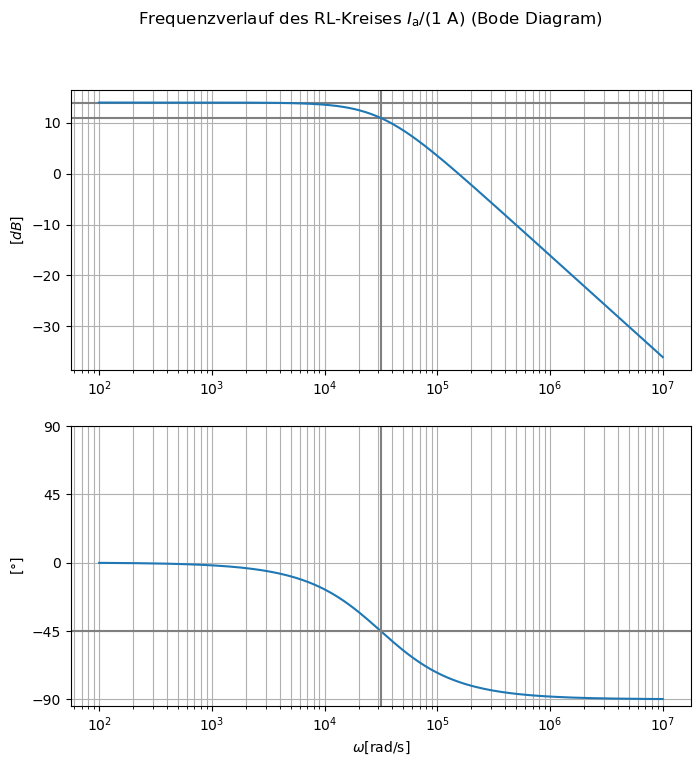

In [3]:
# Strom (Ia)/(1A)
# Ausgangsstrom im Durchlassbereich (5A)/(1A)
# Iref=(1A)

Iodb=20*np.log10(Io/1) # Vertärkunsfaktor in [dB]

w=np.logspace(2,7,200) # Vektor der Kreisfrequenz

Iow=Ue/(1j*w*L+R) # Io in Abhängigkeit von w
Gdb=20*np.log10(abs(Iow)) # Io in [dB]

Gg=20*np.log10(abs(Ue/(R*np.sqrt(2)))) # Vertärkunsfaktor bei der Grenzfrequenz in [dB]

GPh=np.angle(Iow,deg=True) # Phasenverschiebung bei der Grenzfrequenz in [°]

print(f'Io im Durchlassbereich [dB]={Iodb}')
Igdb=20*np.log10(abs(Ue/(1j*wg*L+R))) # Vertärkunsfaktor in [dB]
print(f'Io bei der Grenzfrequenz [dB]={Igdb}')
Igdb=np.angle(Ue/(1j*wg*L+R),deg=True) # Phasenverschiebung bei der Grenzfrequenz in [°]
print(f'Phasenverschiebung bei der Grenzfrequenz in [°]={GgPh:.0f}')


fig,(ax0,ax1) = plt.subplots(2,figsize = (8,8))
ax0.axhline(Iodb,color='gray')
ax0.axhline(Gg,color='gray')
ax0.axvline(wg,color='gray')
ax0.plot(w,Gdb)
ax0.set_xscale('log')
ax0.grid(which='both')

fig.suptitle('Frequenzverlauf des RL-Kreises $I_\mathrm{a}/(1~\mathrm{A})$ (Bode Diagram)')
ax1.set_xlabel('$\omega [\mathrm{rad/s}]$')
ax0.set_ylabel('$[dB]$')

ax1.plot(w,GPh)
ax1.set_ylabel('$[°]$')
ax1.set_xscale('log')
ax1.grid(which='both')
ax1.axhline(-45,color='gray')
ax1.axvline(wg,color='gray')
ax1.set_yticks([-90,-45,0,45,90]);


## LTspice Simulation

<img src='1-d-10-01.svg' width="1000"/>